### Objective: Plot locations with Longitude and Latitude onto US Map

### Load required packages

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import statsmodels as sm
import os
import cartopy.crs as ccrs
import iris

### Load file

In [2]:
dfmap = pd.read_csv('/Users/lnagata/Documents/Python/Shared/Share/US_Map_Data.csv',
                 engine = 'python')

### Check basic stats of data
1. See table sample
2. Assess data types
3. Assess null values

In [3]:
# 1. See table sample
dfmap

,Police,Police_Nbr,Police_Clr,Criminal,latitude,longitude,Crimes
0,A,1,#FF00C4,1,32.543518,-92.624043,1
1,A,1,#FF00C4,2,29.666925,-95.100045,1
2,A,1,#FF00C4,3,30.123529,-95.457847,1
3,A,1,#FF00C4,4,29.490068,-98.587643,1
4,A,1,#FF00C4,5,29.604075,-98.274989,1
...,...,...,...,...,...,...,...
194,J,10,#FF1100,195,32.910725,-96.577932,10
195,J,10,#FF1100,196,30.541743,-91.025189,10
196,J,10,#FF1100,197,29.936499,-95.252741,10
197,J,10,#FF1100,198,30.139995,-96.393195,10


In [4]:
dfmap.describe()

,Police_Nbr,Criminal,latitude,longitude,Crimes
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,5.899497,100.000000,30.126490,-95.822762,5.899497
std,2.746890,57.590508,1.702129,2.338444,2.746890
min,1.000000,1.000000,25.925142,-100.480809,1.000000
25%,4.000000,50.500000,29.517602,-97.675435,4.000000
50%,6.000000,100.000000,29.995677,-95.841269,6.000000
75%,8.000000,149.500000,31.298192,-94.964622,8.000000
max,10.000000,199.000000,34.007244,-90.020449,10.000000


In [5]:
# Make column names more descriptive
dfmap.columns = ["Police Cluster","Police Number","Police_Clr","Criminal ID","Latitude","Longitude","Crime Count"]
dfmap

,Police Cluster,Police Number,Police_Clr,Criminal ID,Latitude,Longitude,Crime Count
0,A,1,#FF00C4,1,32.543518,-92.624043,1
1,A,1,#FF00C4,2,29.666925,-95.100045,1
2,A,1,#FF00C4,3,30.123529,-95.457847,1
3,A,1,#FF00C4,4,29.490068,-98.587643,1
4,A,1,#FF00C4,5,29.604075,-98.274989,1
...,...,...,...,...,...,...,...
194,J,10,#FF1100,195,32.910725,-96.577932,10
195,J,10,#FF1100,196,30.541743,-91.025189,10
196,J,10,#FF1100,197,29.936499,-95.252741,10
197,J,10,#FF1100,198,30.139995,-96.393195,10


In [6]:
# 2. Assess data types

pandas_profiling.ProfileReport(dfmap)

/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,199
Total Missing (%),0.0%
Total size in memory,11.0 KiB
Average record size in memory,56.6 B
Numeric,3
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [7]:
# 3. Assess null values - The profile above suggests there are no null values.

### Plot data on US map

In [8]:
from cartopy import config

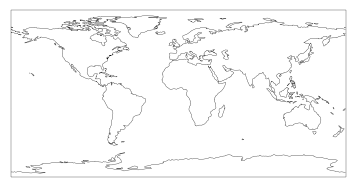

In [9]:
%matplotlib inline
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

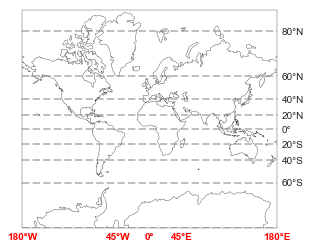

In [10]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.show()

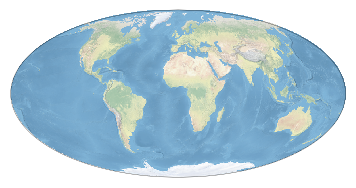

In [11]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

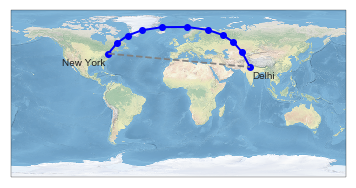

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic(),
         )

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree(),
         )

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

### Scatterplot based on data

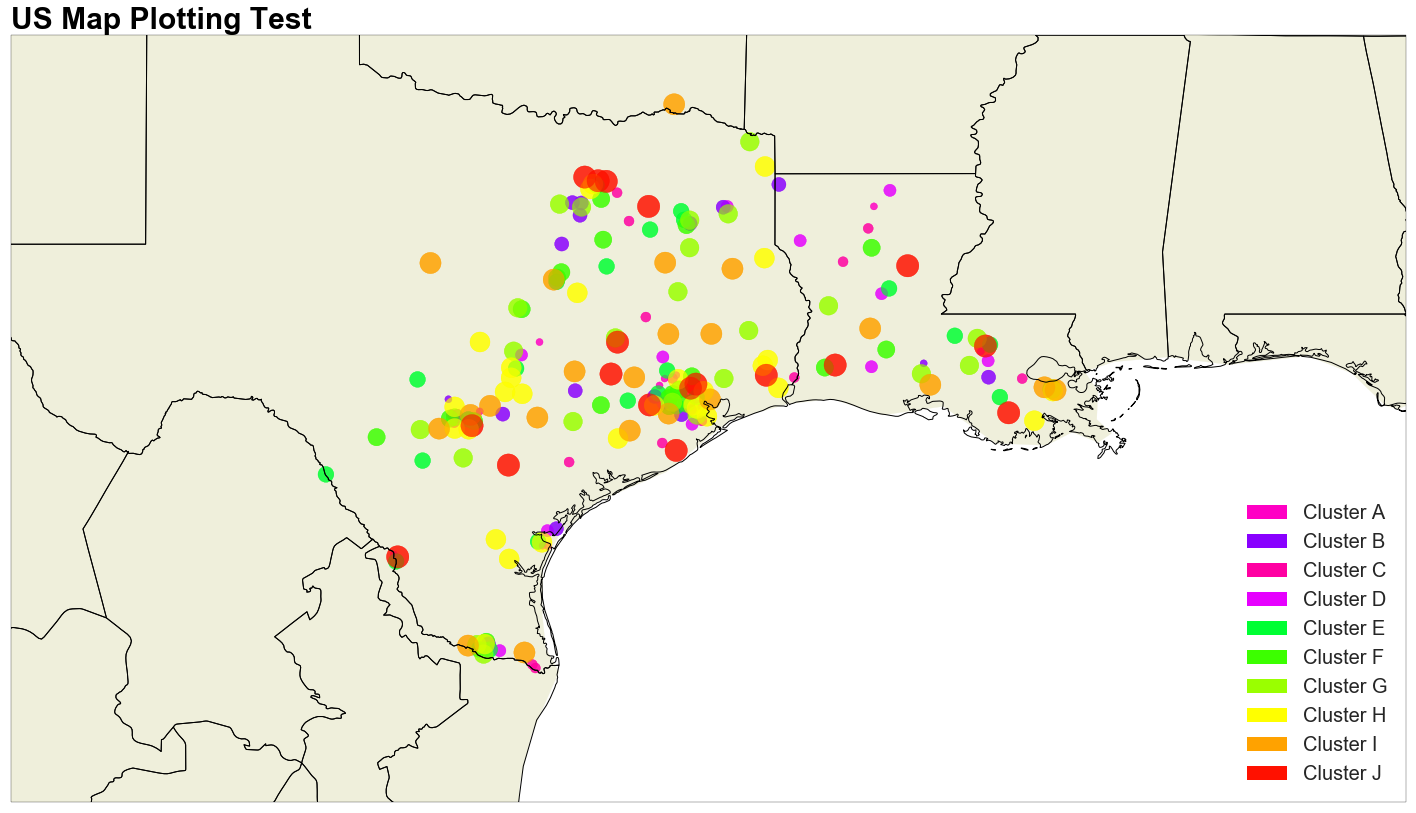

In [13]:
# from https://stackoverflow.com/questions/53412785/plotting-pandas-csv-data-onto-cartopy-map

from matplotlib.animation import FuncAnimation
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

lat, lon = dfmap['Latitude'], dfmap['Longitude']
fig = plt.figure(figsize=(25, 40))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
states = NaturalEarthFeature(category='cultural', scale='10m',
                             facecolor='None',
                             name='admin_1_states_provinces_shp')
ax.add_feature(states, linewidth=1, edgecolor='black')


font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 30,
        }
ax.set_title('US Map Plotting Test', fontdict = font, loc = 'left')


#set_title(self, label, fontdict=None, loc='center', pad=None, **kwargs)[source]

# show only US https://stackoverflow.com/questions/53290602/how-to-use-cartopy-to-create-colored-us-states
# if US continental -- ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
ax.set_extent([-105, -85, 24, 35], ccrs.Geodetic())

plt.scatter(lon, lat, transform=ccrs.PlateCarree(),
           s = dfmap['Crime Count']*50,
           c = dfmap['Police_Clr'],
           marker = 'o',
            alpha = 0.6
           )

lines = plt.scatter(lon, lat, transform=ccrs.PlateCarree(),
           s = dfmap['Crime Count']*50,
           c = dfmap['Police_Clr'],
           marker = 'o',
            alpha = 0.6
           )
        
# legend
import matplotlib.patches as mpatches
values = list('Cluster ' + dfmap['Police Cluster'].unique())
colors = list(dfmap['Police_Clr'].unique())
handles = []

for i in range(len(values)):
    handles.append(mpatches.Circle((0.5, 0.5), 0.25, facecolor = colors[i]))

    
plt.legend(handles, values, loc = 'lower right', 
           fancybox=True, frameon=False, fontsize=20)

plt.show()


In [14]:
colors

['#FF00C4',
 '#8900FF',
 '#FF00A2',
 '#E600FF',
 '#00FF33',
 '#3CFF00',
 '#9AFF00',
 '#FFFF00',
 '#FFA200',
 '#FF1100']

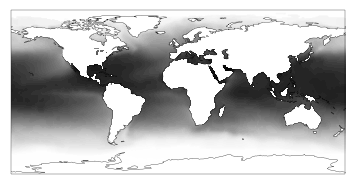

In [15]:
%matplotlib inline
from netCDF4 import Dataset as netcdf_dataset
from cartopy import config
fname = iris.sample_data_path('rotated_pole.nc')
temperature = iris.load_cube(fname)

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

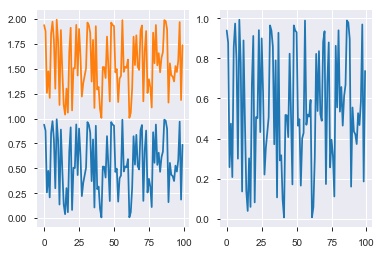

In [16]:
%matplotlib inline

# Generate random data
data = np.random.rand(100)

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(data)

ax2.plot(data)

ax1.plot(data+1)

plt.show()